# Speech Emotion Recognition Using LSTM

## 1. Visualising The Datasets
The datasets CREMA-D (Crowd
Sourced Emotional Multimodal Actors Dataset)
with 7,422 original clips from 91 actors with
age group of 20 to 74 and SAVEE (Survey
Audio-Visual Expressed Emotion) with 480
audio files are taken as base datasets.

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# Ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
SAVEE="/Users/sarikagaind/Downloads/SAVEE/"
CREMA_D="/Users/sarikagaind/Downloads/CREMA-D/"

### SAVEE

In [4]:
dir_list = os.listdir(SAVEE)
dir_list[0:5]


['JK_sa01.wav', 'JK_sa15.wav', 'DC_n13.wav', 'DC_su09.wav', 'DC_n07.wav']

In [5]:
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)

# Checking label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_fear         60
male_disgust      60
male_surprise     60
male_sad          60
male_happy        60
male_angry        60
Name: labels, dtype: int64

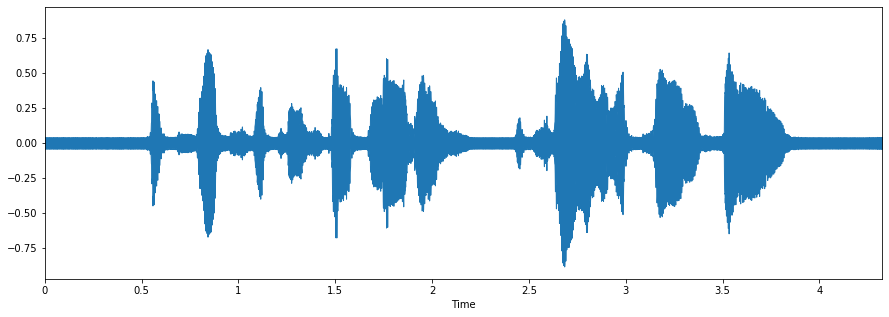

In [6]:
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

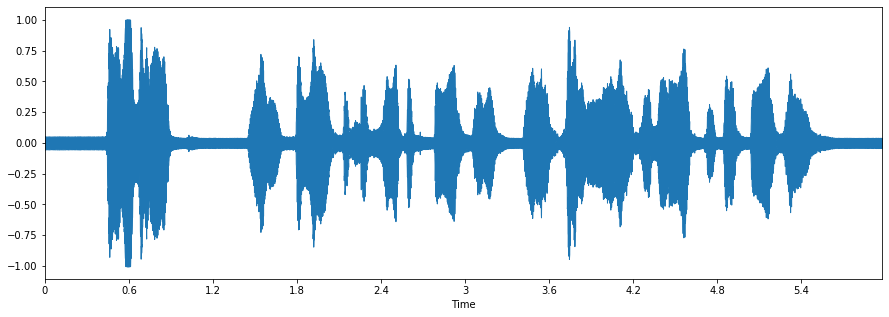

In [7]:
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)


# CREMA-D

In [8]:
dir_list = os.listdir(CREMA_D)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [9]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA_D + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_sad          671
male_disgust      671
male_fear         671
male_happy        671
male_angry        671
female_happy      600
female_angry      600
female_fear       600
female_sad        600
female_disgust    600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

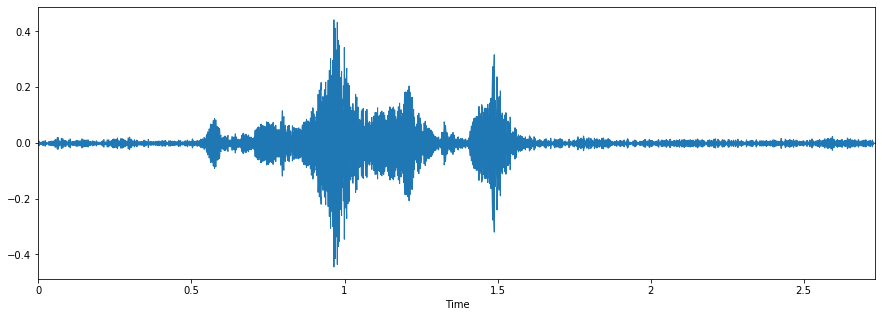

In [10]:
fname = CREMA_D + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

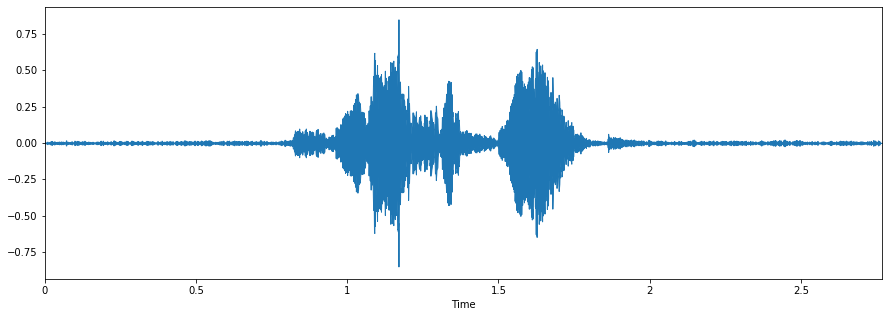

In [11]:
fname = CREMA_D + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [12]:
df = pd.concat([SAVEE_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)


male_sad          731
male_disgust      731
male_fear         731
male_happy        731
male_angry        731
male_neutral      695
female_happy      600
female_angry      600
female_fear       600
female_sad        600
female_disgust    600
female_neutral    512
male_surprise      60
Name: labels, dtype: int64


In [13]:
# Importing our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

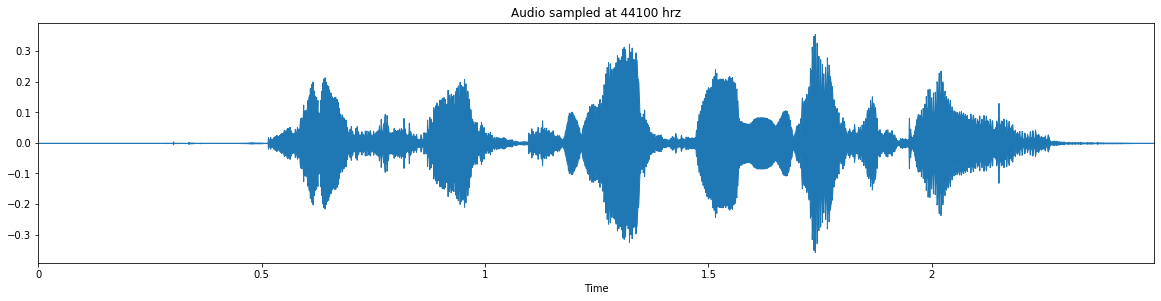

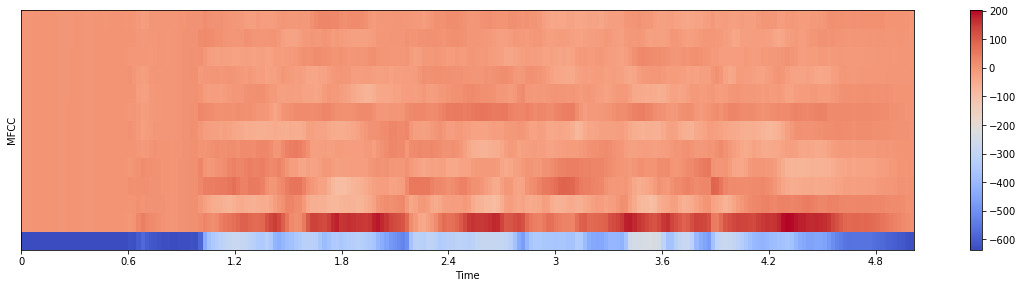

In [14]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/Users/sarikagaind/Downloads/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

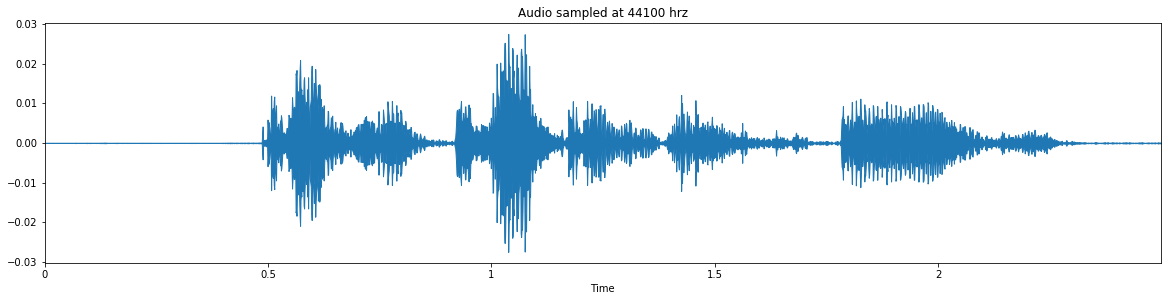

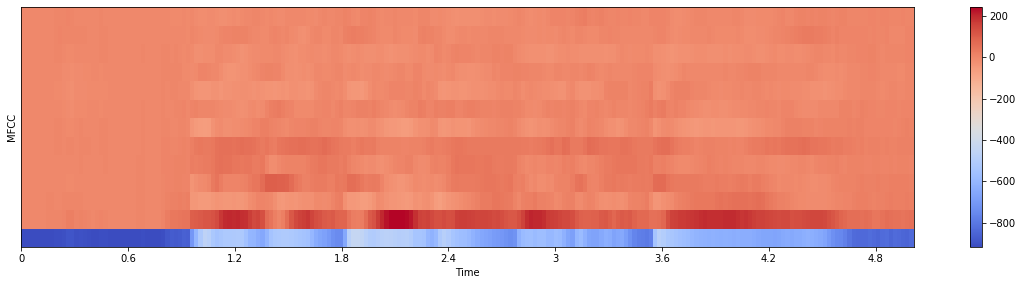

In [15]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/Users/sarikagaind/Downloads/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

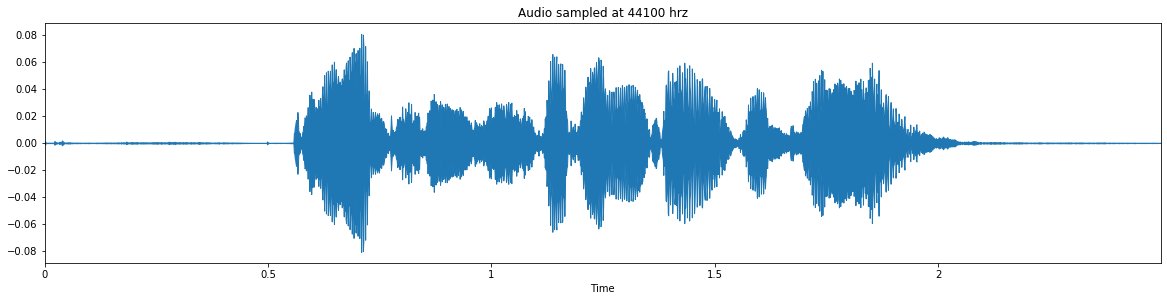

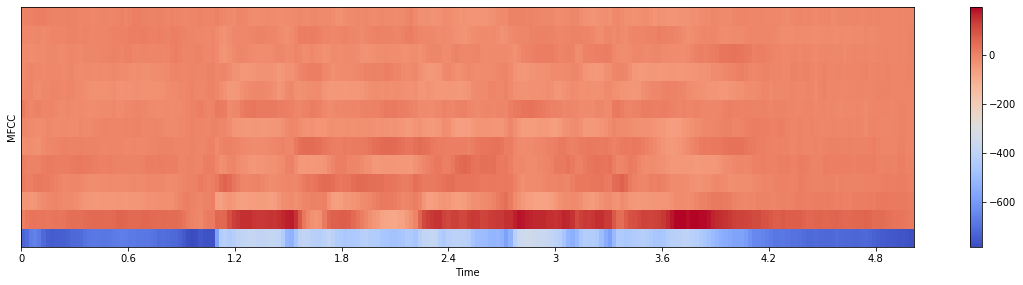

In [16]:
# Source - RAVDESS; Gender - Female; Emotion - Happy
path = "/Users/sarikagaind/Downloads/RAVDESS/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

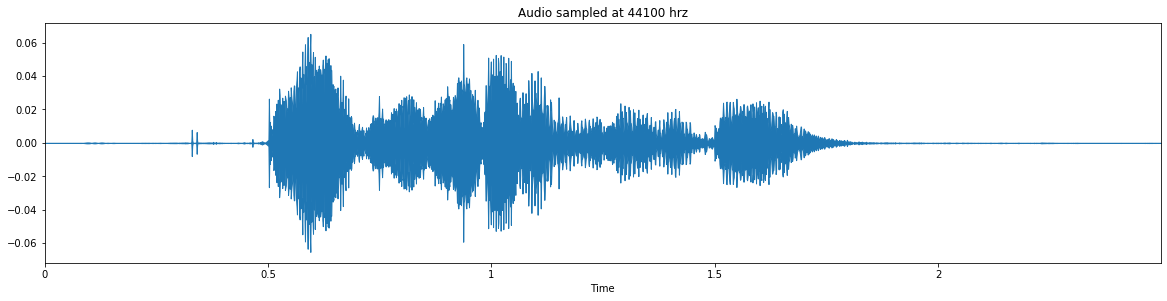

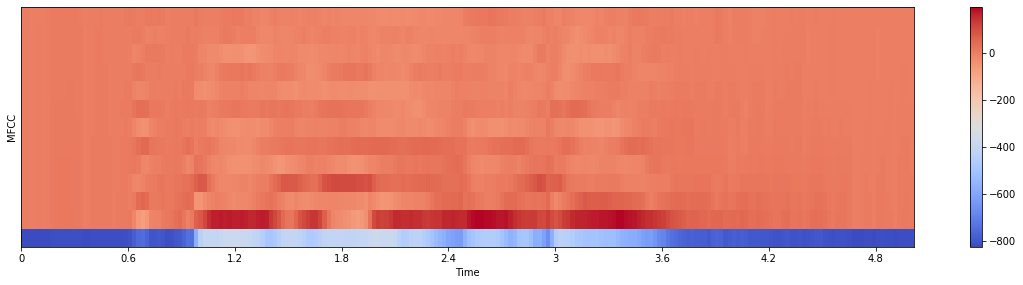

In [17]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "/Users/sarikagaind/Downloads/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


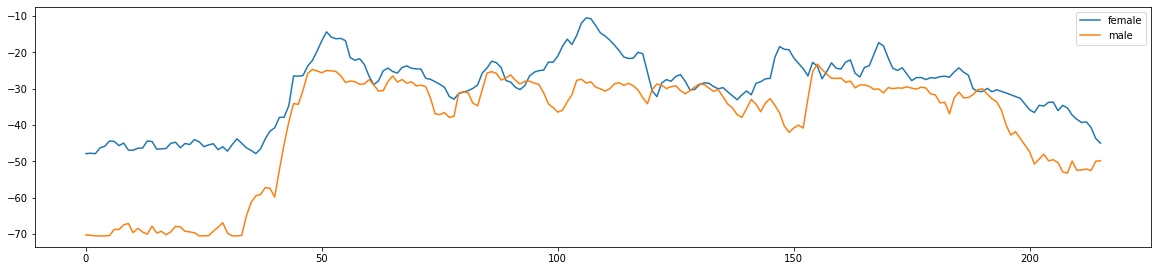

In [18]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/Users/sarikagaind/Downloads/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/Users/sarikagaind/Downloads/Ravdess/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


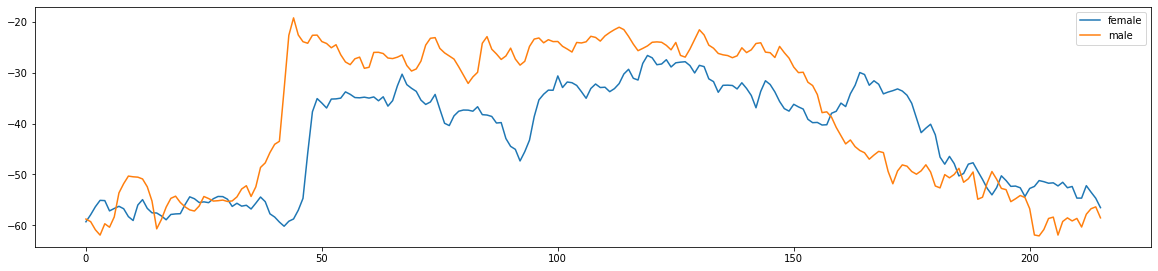

In [19]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "/Users/sarikagaind/Downloads/RAVDESS/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "/Users/sarikagaind/Downloads/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [20]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

Using TensorFlow backend.


In [21]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("/Users/sarikagaind/Data_path.csv")
ref.head()

labels source                                            path
0       male_sad  SAVEE  /Users/sarikagaind/Downloads/SAVEE/JK_sa01.wav
1       male_sad  SAVEE  /Users/sarikagaind/Downloads/SAVEE/JK_sa15.wav
2   male_neutral  SAVEE   /Users/sarikagaind/Downloads/SAVEE/DC_n13.wav
3  male_surprise  SAVEE  /Users/sarikagaind/Downloads/SAVEE/DC_su09.wav
4   male_neutral  SAVEE   /Users/sarikagaind/Downloads/SAVEE/DC_n07.wav

In [22]:
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

7922


feature
0  [-23.589674, -24.579994, -22.594236, -21.48121...
1  [-23.371296, -24.25871, -24.391262, -23.972637...
2  [-3.8807042, -5.170106, -8.079335, -7.4936047,...
3  [-7.7042007, -6.693756, -7.5397215, -8.864786,...
4  [-4.9374447, -5.9628134, -9.859098, -8.692251,...

In [23]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels source                                            path  \
0       male_sad  SAVEE  /Users/sarikagaind/Downloads/SAVEE/JK_sa01.wav   
1       male_sad  SAVEE  /Users/sarikagaind/Downloads/SAVEE/JK_sa15.wav   
2   male_neutral  SAVEE   /Users/sarikagaind/Downloads/SAVEE/DC_n13.wav   
3  male_surprise  SAVEE  /Users/sarikagaind/Downloads/SAVEE/DC_su09.wav   
4   male_neutral  SAVEE   /Users/sarikagaind/Downloads/SAVEE/DC_n07.wav   

           0          1          2          3          4          5  \
0 -23.589674 -24.579994 -22.594236 -21.481213 -20.949923 -20.414589   
1 -23.371296 -24.258711 -24.391262 -23.972637 -23.494141 -24.208841   
2  -3.880704  -5.170106  -8.079335  -7.493605  -7.611509  -5.591492   
3  -7.704201  -6.693756  -7.539721  -8.864786  -8.661815  -8.826547   
4  -4.937445  -5.962813  -9.859098  -8.692251  -8.685309  -8.844451   

           6  ...        206        207        208        209        210  \
0 -20.267546  ...  -8.499668 -10.080903 -12.700766 -17.040066 -20.240370   
1 -25.631187  ...  -8.738687  -8.822194  -8.977812  -9.998901 -15.777990   
2  -4.388686  ...        NaN        NaN        NaN        NaN        NaN   
3  -9.143904  ... -25.902903 -25.006645 -24.709747 -25.516710 -26.941380   
4  -8.032232  ... -11.438392 -11.691319 -11.480921 -10.730117  -9.891499   

         211        212        213        214        215  
0 -23.302591 -24.621037 -23.829395 -12.847005  -5.907684  
1 -22.670012 -23.585886 -24.138811 -26.113234 -27.176575  
2        NaN        NaN        NaN        NaN        NaN  
3 -25.354641 -25.213074 -27.607460 -25.052874 -22.871309  
4  -9.329518  -8.907435  -8.881425  -8.315574  -7.196213  

[5 rows x 219 columns]

In [24]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(7922, 219)


labels source                                            path  \
0       male_sad  SAVEE  /Users/sarikagaind/Downloads/SAVEE/JK_sa01.wav   
1       male_sad  SAVEE  /Users/sarikagaind/Downloads/SAVEE/JK_sa15.wav   
2   male_neutral  SAVEE   /Users/sarikagaind/Downloads/SAVEE/DC_n13.wav   
3  male_surprise  SAVEE  /Users/sarikagaind/Downloads/SAVEE/DC_su09.wav   
4   male_neutral  SAVEE   /Users/sarikagaind/Downloads/SAVEE/DC_n07.wav   

           0          1          2          3          4          5  \
0 -23.589674 -24.579994 -22.594236 -21.481213 -20.949923 -20.414589   
1 -23.371296 -24.258711 -24.391262 -23.972637 -23.494141 -24.208841   
2  -3.880704  -5.170106  -8.079335  -7.493605  -7.611509  -5.591492   
3  -7.704201  -6.693756  -7.539721  -8.864786  -8.661815  -8.826547   
4  -4.937445  -5.962813  -9.859098  -8.692251  -8.685309  -8.844451   

           6  ...        206        207        208        209        210  \
0 -20.267546  ...  -8.499668 -10.080903 -12.700766 -17.040066 -20.240370   
1 -25.631187  ...  -8.738687  -8.822194  -8.977812  -9.998901 -15.777990   
2  -4.388686  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
3  -9.143904  ... -25.902903 -25.006645 -24.709747 -25.516710 -26.941380   
4  -8.032232  ... -11.438392 -11.691319 -11.480921 -10.730117  -9.891499   

         211        212        213        214        215  
0 -23.302591 -24.621037 -23.829395 -12.847005  -5.907684  
1 -22.670012 -23.585886 -24.138811 -26.113234 -27.176575  
2   0.000000   0.000000   0.000000   0.000000   0.000000  
3 -25.354641 -25.213074 -27.607460 -25.052874 -22.871309  
4  -9.329518  -8.907435  -8.881425  -8.315574  -7.196213  

[5 rows x 219 columns]

In [25]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]


0          1          2          3          4          5    \
7151  -8.375333 -11.825686 -15.752026 -17.390879 -18.254370 -15.385367   
4661 -20.452309 -19.590313 -19.827141 -20.518330 -20.199619 -20.846823   
931  -19.056593 -16.709843 -15.861470 -15.340598 -15.784597 -17.454962   
3412 -13.804369 -13.650095 -12.314545 -12.811295 -11.743667 -12.957935   
691  -20.913189 -20.371944 -20.973789 -22.204350 -21.211683 -21.222797   
1891 -16.266710 -16.123903 -16.960888 -17.550486 -16.128967 -15.619786   
3664 -22.560030 -19.045353 -19.309637 -19.365528 -18.019070 -17.607767   
2778 -25.000336 -20.910563 -19.913546 -19.853722 -19.338926 -19.224739   
6300 -19.949465 -18.660475 -19.943083 -19.217083 -16.281498 -14.906611   
6428 -14.685652 -12.759034 -14.018633 -16.871763 -17.372093 -17.591587   

            6          7          8          9    ...        206        207  \
7151 -16.374626 -18.136869 -18.460468 -19.539028  ...   0.000000   0.000000   
4661 -21.975044 -20.105326 -21.535530 -22.017233  ... -18.553205 -17.536503   
931  -16.526340 -14.542943 -16.369644 -18.014660  ...   0.000000   0.000000   
3412 -14.479417 -15.897182 -13.552906 -12.795383  ... -18.639933 -17.269377   
691  -22.158909 -20.736692 -21.366669 -25.821337  ...   0.000000   0.000000   
1891 -16.323391 -17.251192 -15.836840 -15.898198  ...   0.000000   0.000000   
3664 -16.831846 -17.997807 -20.233303 -21.055025  ...   0.000000   0.000000   
2778 -21.142559 -22.371727 -20.909698 -19.978535  ...   0.000000   0.000000   
6300 -15.619277 -17.802593 -15.774145 -15.269282  ...   0.000000   0.000000   
6428 -15.890990 -15.404746 -17.257946 -18.104872  ...   0.000000   0.000000   

            208        209        210        211        212        213  \
7151   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4661 -17.763445 -20.729122 -21.028664 -22.445574 -18.426685 -17.925251   
931    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3412 -16.440022 -18.147245 -19.159567 -20.410326 -23.574139   0.000000   
691    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1891   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3664   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2778   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
6300   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
6428   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

            214        215  
7151   0.000000   0.000000  
4661 -20.697226 -21.976992  
931    0.000000   0.000000  
3412   0.000000   0.000000  
691    0.000000   0.000000  
1891   0.000000   0.000000  
3664   0.000000   0.000000  
2778   0.000000   0.000000  
6300   0.000000   0.000000  
6428   0.000000   0.000000  

[10 rows x 216 columns]

In [26]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
7151  1.377031  0.933402  0.311273 -0.094293 -0.321700  0.342839  0.088060   
4661 -0.613414 -0.611434 -0.652031 -0.834246 -0.782448 -0.946318 -1.228496   
931  -0.383381 -0.038341  0.285402  0.390802  0.263286 -0.145681  0.052395   
3412  0.482255  0.570421  1.123848  0.989233  1.220413  0.915826  0.533590   
691  -0.689373 -0.766946 -0.923083 -1.233157 -1.022164 -1.035065 -1.271720   
1891  0.076428  0.078237  0.025514 -0.132056  0.181719  0.287505  0.100105   
3664 -0.960794 -0.503010 -0.529700 -0.561494 -0.265967 -0.181750 -0.019424   
2778 -1.362989 -0.874108 -0.672456 -0.677000 -0.578586 -0.563431 -1.032794   
6300 -0.530538 -0.426435 -0.679438 -0.526372  0.145591  0.455848  0.265629   
6428  0.337007  0.747705  0.721024  0.028529 -0.112726 -0.177931  0.201754   

           7         8         9    ...       206       207       208  \
7151 -0.341997 -0.429712 -0.691773  ...  0.551417  0.527367  0.527566   
4661 -0.805984 -1.149118 -1.272552  ... -1.579953 -1.545223 -1.576418   
931   0.505130  0.059434 -0.334530  ...  0.551417  0.527367  0.527566   
3412  0.185921  0.718406  0.888633  ... -1.589917 -1.513652 -1.419666   
691  -0.954804 -1.109613 -2.164063  ...  0.551417  0.527367  0.527566   
1891 -0.133234  0.184083  0.161473  ...  0.551417  0.527367  0.527566   
3664 -0.309219 -0.844464 -1.047054  ...  0.551417  0.527367  0.527566   
2778 -1.340199 -1.002706 -0.794773  ...  0.551417  0.527367  0.527566   
6300 -0.263205  0.198750  0.308863  ...  0.551417  0.527367  0.527566   
6428  0.301993 -0.148383 -0.355671  ...  0.551417  0.527367  0.527566   

           209       210       211       212      213       214       215  
7151  0.527882  0.501179  0.501372  0.501059  0.47989  0.475554  0.467537  
4661 -1.908643 -2.071075 -2.238842 -1.718993 -1.75045 -2.122199 -2.226518  
931   0.527882  0.501179  0.501372  0.501059  0.47989  0.475554  0.467537  
3412 -1.605166 -1.842445 -1.990374 -2.339159  0.47989  0.475554  0.467537  
691   0.527882  0.501179  0.501372  0.501059  0.47989  0.475554  0.467537  
1891  0.527882  0.501179  0.501372  0.501059  0.47989  0.475554  0.467537  
3664  0.527882  0.501179  0.501372  0.501059  0.47989  0.475554  0.467537  
2778  0.527882  0.501179  0.501372  0.501059  0.47989  0.475554  0.467537  
6300  0.527882  0.501179  0.501372  0.501059  0.47989  0.475554  0.467537  
6428  0.527882  0.501179  0.501372  0.501059  0.47989  0.475554  0.467537  

[10 rows x 216 columns]

In [27]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(5941, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'male_angry' 'male_disgust' 'male_fear'
 'male_happy' 'male_neutral' 'male_sad' 'male_surprise']


In [28]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape


(5941, 216, 1)

In [29]:
from keras.datasets import imdb

In [30]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]


## 2. Trainging The Models

### Model1
Categorical Cross Entropy is used as the loss function. It is used for multi-class classification where each example belongs to a single class. 

In [31]:
model1=Sequential()
model1.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(n_outputs, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [32]:
def evaluate_model(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 0, 15, 64
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model1 = Sequential()
    model1.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model1.add(Dropout(0.5))
    model1.add(Dense(100, activation='relu'))
    model1.add(Dense(n_outputs, activation='softmax'))
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model1.fit(X_train, y_train, epochs=15, batch_size=64, verbose=0)
    # Evaluating the model
    _, accuracy = model1.evaluate(X_test, y_test, batch_size=64, verbose=0)
    return accuracy



In [33]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 13)                1313      
Total params: 52,213
Trainable params: 52,213
Non-trainable params: 0
_________________________________________________________________


In [34]:
X_valid1, y_valid1 = X_train[:64], y_train[:64]
X_train1, y_train1 = X_train[64:], y_train[64:]
model1_history=model1.fit(X_train1, y_train1, validation_data=(X_valid1, y_valid1), batch_size=64, epochs=15)

Instructions for updating:
Use tf.cast instead.
Train on 5877 samples, validate on 64 samples
Epoch 1/15
5877/5877 [==============================] - 27s 5ms/step - loss: 2.5092 - accuracy: 0.1065 - val_loss: 2.5002 - val_accuracy: 0.1562
Epoch 2/15
5877/5877 [==============================] - 30s 5ms/step - loss: 2.4890 - accuracy: 0.1133 - val_loss: 2.4843 - val_accuracy: 0.1562
Epoch 3/15
5877/5877 [==============================] - 27s 5ms/step - loss: 2.4964 - accuracy: 0.1072 - val_loss: 2.5383 - val_accuracy: 0.0938
Epoch 4/15
5877/5877 [==============================] - 28s 5ms/step - loss: 2.4902 - accuracy: 0.1147 - val_loss: 2.5028 - val_accuracy: 0.1719
Epoch 5/15
5877/5877 [==============================] - 27s 5ms/step - loss: 2.4832 - accuracy: 0.1140 - val_loss: 2.4908 - val_accuracy: 0.1719
Epoch 6/15
5877/5877 [==============================] - 25s 4ms/step - loss: 2.4794 - accuracy: 0.1123 - val_loss: 2.4969 - val_accuracy: 0.1406
Epoch 7/15
5877/5877 [==============

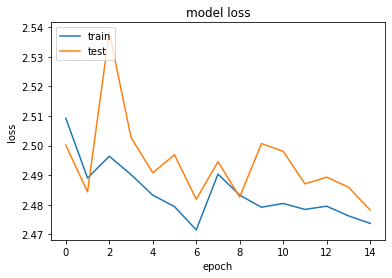

Test accuracy: 0.1317516416311264


In [35]:
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
scores = model1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

In [36]:
# Save model and weights
model1_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model1_path = os.path.join(save_dir, model1_name)
model1.save(model1_path)
print('Save model and weights at %s ' % model1_path)

# Save the model to disk
model1_json = model1.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model1_json)

Save model and weights at /Users/sarikagaind/saved_models/Emotion_Model.h5 


In [37]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model1_json = json_file.read()
json_file.close()
loaded_model1 = model_from_json(loaded_model1_json)

# load weights into new model
loaded_model1.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model1.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model1.metrics_names[1], score[1]*100))


Loaded model from disk
accuracy: 13.18%


### MODEL2
Binary Cross Entropy is used as the loss function which is used for multi-label classifications.

In [38]:
model2=Sequential()
model2.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
def evaluate_model(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 0, 15, 64
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model2 = Sequential()
    model2.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model2.add(Dropout(0.5))
    model2.add(Dense(100, activation='relu'))
    model2.add(Dense(n_outputs, activation='softmax'))
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model2.fit(X_train, y_train, epochs=15, batch_size=64, verbose=0)
    # evaluate model
    _, accuracy = model2.evaluate(X_test, y_test, batch_size=64, verbose=0)
    return accuracy



In [40]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 13)                1313      
Total params: 52,213
Trainable params: 52,213
Non-trainable params: 0
_________________________________________________________________


In [41]:
X_valid2, y_valid2 = X_train[:64], y_train[:64]
X_train2, y_train2 = X_train[64:], y_train[64:]
model2_history=model2.fit(X_train2, y_train2, validation_data=(X_valid2, y_valid2), batch_size=64, epochs=15)

Train on 5877 samples, validate on 64 samples
Epoch 1/15
5877/5877 [==============================] - 27s 5ms/step - loss: 0.2679 - accuracy: 0.9231 - val_loss: 0.2676 - val_accuracy: 0.9231
Epoch 2/15
5877/5877 [==============================] - 24s 4ms/step - loss: 0.2652 - accuracy: 0.9231 - val_loss: 0.2662 - val_accuracy: 0.9231
Epoch 3/15
5877/5877 [==============================] - 27s 5ms/step - loss: 0.2647 - accuracy: 0.9231 - val_loss: 0.2664 - val_accuracy: 0.9231
Epoch 4/15
5877/5877 [==============================] - 32s 5ms/step - loss: 0.2650 - accuracy: 0.9231 - val_loss: 0.2705 - val_accuracy: 0.9231
Epoch 5/15
5877/5877 [==============================] - 26s 4ms/step - loss: 0.2617 - accuracy: 0.9231 - val_loss: 0.2689 - val_accuracy: 0.9231
Epoch 6/15
5877/5877 [==============================] - 26s 4ms/step - loss: 0.2587 - accuracy: 0.9231 - val_loss: 0.2666 - val_accuracy: 0.9231
Epoch 7/15
5877/5877 [==============================] - 25s 4ms/step - loss: 0.2585 

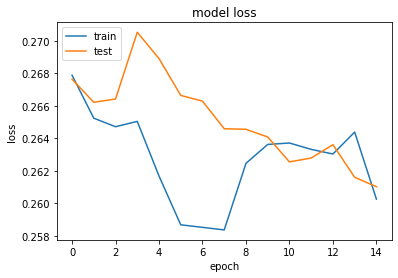

Test accuracy: 0.9230767488479614


In [42]:
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
scores = model2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

In [43]:
# Save model and weights
model2_name = 'Emotion_Model.h6'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model2_path = os.path.join(save_dir, model2_name)
model2.save(model2_path)
print('Save model2 and weights at %s ' % model2_path)

# Save the model to disk
model2_json = model2.to_json()
with open("model2_json.json", "w") as json_file:
    json_file.write(model2_json)

Save model2 and weights at /Users/sarikagaind/saved_models/Emotion_Model.h6 


In [44]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model2_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model2_json)

# load weights into new model
loaded_model2.load_weights("saved_models/Emotion_Model.h6")
print("Loaded model2 from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model2.metrics_names[1], score[1]*100))


Loaded model2 from disk
accuracy: 92.31%


## 3. Testing On Recorded Samples


In [45]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [58]:
categories = ['male_angry' ,'male_happy','male_sad','male_disgust','male_fear','female_happy','female_sad','female_angry','female_fear','female_disgust','male_neutral','female_neutral']

In [59]:
audio = "/Users/sarikagaind/test/JE_n23.wav"


In [60]:
data, sampling_rate = librosa.load("/Users/sarikagaind/test/JE_n23.wav")

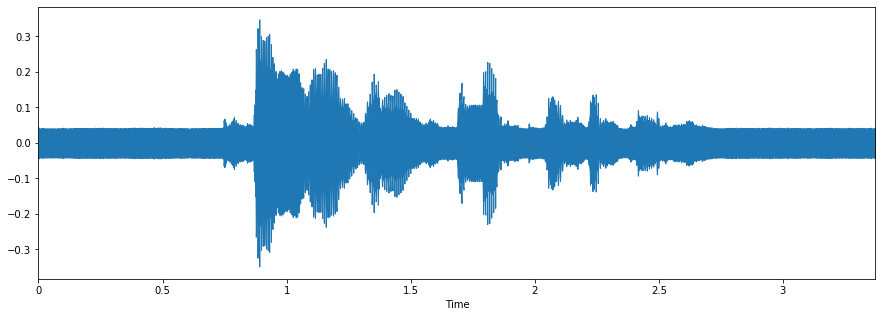

In [61]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [62]:
X, sample_rate = librosa.load("/Users/sarikagaind/test/JE_n23.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [63]:
livedf2= pd.DataFrame(data=livedf2)

In [64]:
livedf2 = livedf2.stack().to_frame().T

In [65]:
twodim= np.expand_dims(livedf2, axis=2)

In [66]:

livepreds = model2.predict(twodim, batch_size=32, verbose=1)

1/1 [==============================] - 0s 28ms/step


In [67]:
livepreds1=livepreds.argmax(axis=1)

In [68]:
liveabc = livepreds1.astype(int).flatten()

In [69]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_neutral'], dtype=object)